In [40]:
# outliers:-

✨ Outlier Detection Methods :
Statistical Methods
Z-Score: Ye check karta hai data point mean se kitna door hai — agar Z > 3 ya < -3 ho toh outlier hai.
IQR (Interquartile Range): Outliers wo points hote hain jo Q1 - 1.5 × IQR ya Q3 + 1.5 × IQR ke bahar hote hain.
Modified Z-Score: Skewed data ke liye mean ki jagah median use karta hai outliers find karne ke liye.
Machine Learning Methods
Isolation Forest: Randomly data ko split karta hai — jo points jaldi isolate ho jayein, wo outliers hote hain.
DBSCAN: Dense clusters se door low-density points ko outliers tag karta hai.
One-Class SVM: Normal data ka boundary draw karta hai — jo points is boundary ke bahar hote hain, wo outliers hote hain.
Deep Learning Methods
Autoencoders: Normal data ko easily reconstruct karta hai, lekin outliers ke liye reconstruction error high hota hai.
LSTM: Time-series data mein patterns break hone par outliers detect karta hai.


In [41]:
# 1 method:
# Z-score:


In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# visualization k liye krna pdega jupyter notebook mei

In [51]:
def detect_outliers(data):
    outliers = []  # Initialize an empty list to store outliers
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    
    return outliers

# Sample dataset with some outliers
data = [10, 12, 14, 15, 17, 19, 20, 22, 25, 27, 30, 33, 35, 37, 40, 100, 105, 110, 200, 250]

# Detect outliers
print("Outliers:", detect_outliers(data))


Outliers: [250]


(array([12.,  3.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([ 10.,  34.,  58.,  82., 106., 130., 154., 178., 202., 226., 250.]),
 <BarContainer object of 10 artists>)

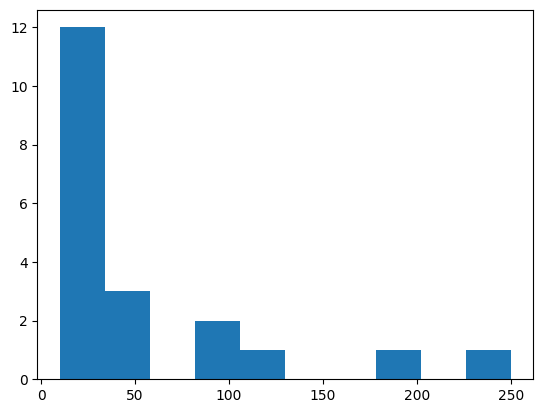

In [53]:
plt.hist(data)

In [ ]:
<!-- 2nd method:IQR -->
# 1.sort the dataset
# 2.find Q1 and Q3
# 3.FInd the IQR i.e Q3-Q1
# 4.caculate lower fence:Q1-1.5*(IQR)
# and higher fence:Q3+1.5*(IQR)

In [56]:
data = [10, 12, 14, 15, 17, 19, 20, 22, 25, 27, 30, 33, 35, 37, 40, 100, 105, 110, 200, 250]

In [58]:
data=sorted(data)
data

[10,
 12,
 14,
 15,
 17,
 19,
 20,
 22,
 25,
 27,
 30,
 33,
 35,
 37,
 40,
 100,
 105,
 110,
 200,
 250]

In [60]:
# to find Q1 and Q3
q1,q3=np.percentile(data,[25,75])
print(q1,q3)

18.5 55.0


In [62]:
# to calculate the IQR
iqr=q3-q1
print(iqr)

36.5


In [64]:
# to find lower and higher fence
lower_fence=q1-(1.5)*iqr
higher_fence=q3+(1.5)*iqr

In [68]:
print(lower_fence)
print(higher_fence)

-36.25
109.75


In [74]:
out_result=[x for x in data if x < lower_fence  or x> higher_fence]
print(out_result)

[110, 200, 250]


NameError: name 'out_result' is not defined